In [2]:
import pandas as pd

from huggingface_hub import login
login("key")


all_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_pull_request.parquet")
all_repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_repository.parquet")
all_user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_user.parquet")


# AIDev-pop (repositories that have more than 100 stars)
# Basic
pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pull_request.parquet")
repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/repository.parquet")
user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/user.parquet")

# Comments and reviews
pr_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_comments.parquet")
pr_reviews_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_reviews.parquet")
pr_review_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_review_comments_v2.parquet")

# Commits
pr_commits_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commits.parquet")
pr_commit_details_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commit_details.parquet")

# Related issues
related_issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/related_issue.parquet")
issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/issue.parquet")

# Events
pr_timeline_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_timeline.parquet")

# Task type
pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_task_type.parquet")

# Human-PR
human_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pull_request.parquet")
human_pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pr_task_type.parquet")

### 1. Create a dataframe with only closed pull requests

In [3]:
closed_prs = pr_df.loc[pr_df['state'] == 'closed', ['id',"created_at","closed_at","agent"]]
closed_prs['created_at'] = pd.to_datetime(closed_prs['created_at'])
closed_prs['closed_at'] = pd.to_datetime(closed_prs['closed_at'])
closed_prs['time_to_close'] = closed_prs['closed_at'] - closed_prs['created_at']
closed_prs

,id,created_at,closed_at,agent,time_to_close
0,3264933329,2025-07-26 02:59:01+00:00,2025-07-29 07:01:20+00:00,Claude_Code,3 days 04:02:19
1,3265118634,2025-07-26 04:56:55+00:00,2025-07-26 22:12:24+00:00,Claude_Code,0 days 17:15:29
2,3265640341,2025-07-26 13:31:19+00:00,2025-07-26 13:37:22+00:00,Claude_Code,0 days 00:06:03
3,3265709660,2025-07-26 14:07:22+00:00,2025-07-26 14:45:30+00:00,Claude_Code,0 days 00:38:08
16,3234102722,2025-07-16 01:00:34+00:00,2025-07-17 12:49:29+00:00,Claude_Code,1 days 11:48:55
...,...,...,...,...,...
33591,2857942945,2025-02-17 13:57:22+00:00,2025-02-17 14:40:12+00:00,Devin,0 days 00:42:50
33592,2857959763,2025-02-17 14:04:15+00:00,2025-02-25 16:39:21+00:00,Devin,8 days 02:35:06
33593,2858280902,2025-02-17 16:15:35+00:00,2025-02-17 16:23:53+00:00,Devin,0 days 00:08:18
33594,2858429985,2025-02-17 17:19:32+00:00,2025-02-18 08:32:15+00:00,Devin,0 days 15:12:43


In [4]:
# Define a function for 5-number summary
def five_number_summary(x):
    return pd.Series({
        'Min': x.min(),
        'Q1': x.quantile(0.25),
        'Median': x.median(),
        'Q3': x.quantile(0.75),
        'Max': x.max()
    })

# Apply to each group
summary = closed_prs.groupby("agent")["time_to_close"].apply(five_number_summary)
print(summary)

agent               
Claude_Code   Min             0 days 00:00:06
              Q1       0 days 00:15:02.500000
              Median   0 days 01:57:11.500000
              Q3       1 days 02:14:46.500000
              Max            74 days 21:41:55
Copilot       Min             0 days 00:00:01
              Q1       0 days 01:06:48.500000
              Median          0 days 13:00:36
              Q3       3 days 17:34:16.500000
              Max            70 days 02:35:00
Cursor        Min             0 days 00:00:03
              Q1              0 days 00:05:14
              Median          0 days 00:53:44
              Q3       0 days 17:47:18.500000
              Max            34 days 18:29:33
Devin         Min             0 days 00:00:08
              Q1              0 days 00:36:37
              Median          0 days 08:54:41
              Q3              5 days 03:34:48
              Max           147 days 21:11:36
OpenAI_Codex  Min             0 days 00:00:03
             

In [6]:
closed_prs['hours'] = closed_prs['time_to_close'].dt.total_seconds()/3600
closed_prs['hours']

0         76.038611
1         17.258056
2          0.100833
3          0.635556
16        35.815278
            ...    
33591      0.713889
33592    194.585000
33593      0.138333
33594     15.211944
33595    103.066667
Name: hours, Length: 31284, dtype: float64

In [8]:
filtered_only_closed = pr_timeline_df[pr_timeline_df['pr_id'].isin(closed_prs['id'])]

merged_timeline_agent = filtered_only_closed.merge(
    closed_prs, 
    left_on="pr_id", 
    right_on="id", 
    how="left"
)

counts = merged_timeline_agent[['pr_id', 'agent']].value_counts().reset_index(name='iterations')

analysis_df = counts.merge(
    closed_prs, 
    left_on="pr_id", 
    right_on="id", 
    how="left"
)

In [9]:
analysis_df

,pr_id,agent_x,iterations,id,created_at,closed_at,agent_y,time_to_close,hours
0,3225725945,Claude_Code,60,3225725945,2025-07-12 20:01:16+00:00,2025-07-12 21:13:35+00:00,Claude_Code,0 days 01:12:19,1.205278
1,2756921963,Devin,30,2756921963,2024-12-24 00:23:09+00:00,2025-01-09 11:13:02+00:00,Devin,16 days 10:49:53,394.831389
2,3226175596,Copilot,30,3226175596,2025-07-13 06:11:58+00:00,2025-07-14 02:51:28+00:00,Copilot,0 days 20:39:30,20.658333
3,3226500911,Claude_Code,30,3226500911,2025-07-13 13:19:25+00:00,2025-07-13 13:21:31+00:00,Claude_Code,0 days 00:02:06,0.035000
4,3023613188,Devin,30,3023613188,2025-04-28 03:41:27+00:00,2025-05-01 03:23:00+00:00,Devin,2 days 23:41:33,71.692500
...,...,...,...,...,...,...,...,...,...
31279,3275983098,Cursor,2,3275983098,2025-07-30 07:27:33+00:00,2025-07-30 07:28:20+00:00,Cursor,0 days 00:00:47,0.013056
31280,3214900515,OpenAI_Codex,2,3214900515,2025-07-09 07:48:24+00:00,2025-07-09 11:16:21+00:00,OpenAI_Codex,0 days 03:27:57,3.465833
31281,3222447409,Cursor,2,3222447409,2025-07-11 10:46:51+00:00,2025-07-11 10:49:22+00:00,Cursor,0 days 00:02:31,0.041944
31282,3222463688,Cursor,2,3222463688,2025-07-11 10:52:49+00:00,2025-07-11 14:07:36+00:00,Cursor,0 days 03:14:47,3.246389


### Plot the time vs iterations for each agent

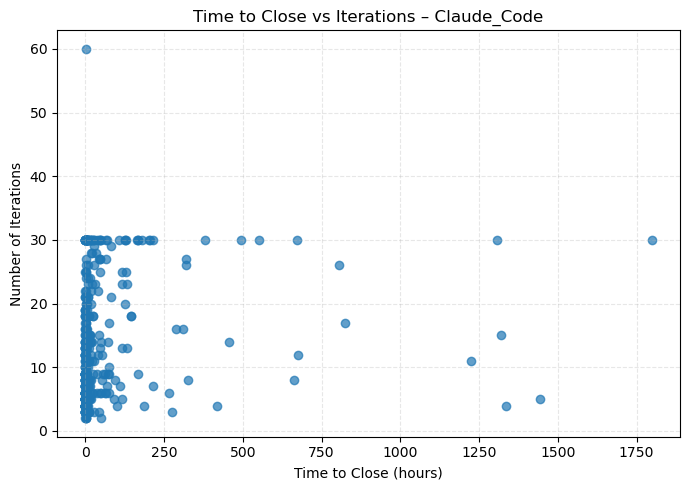

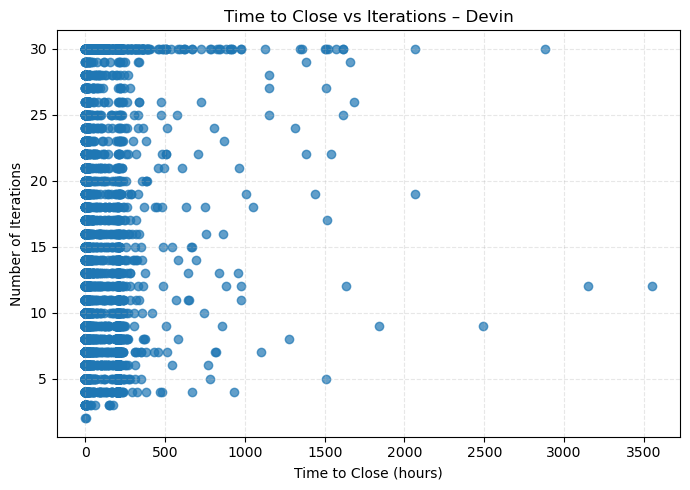

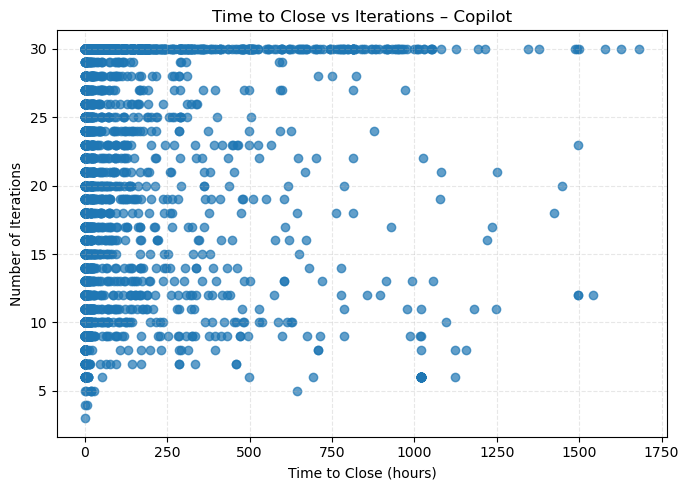

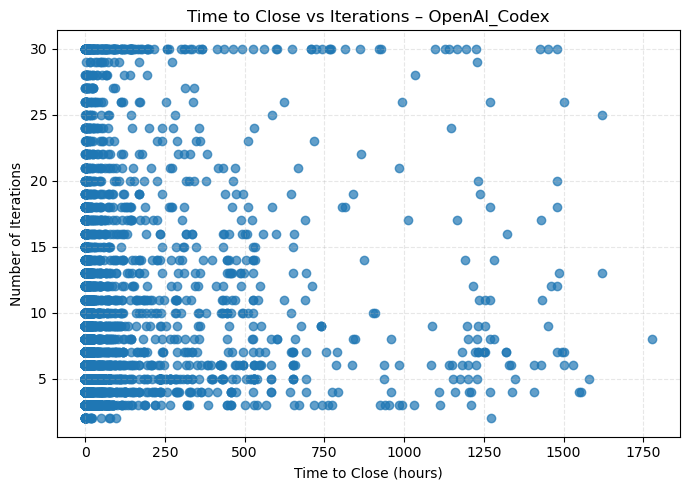

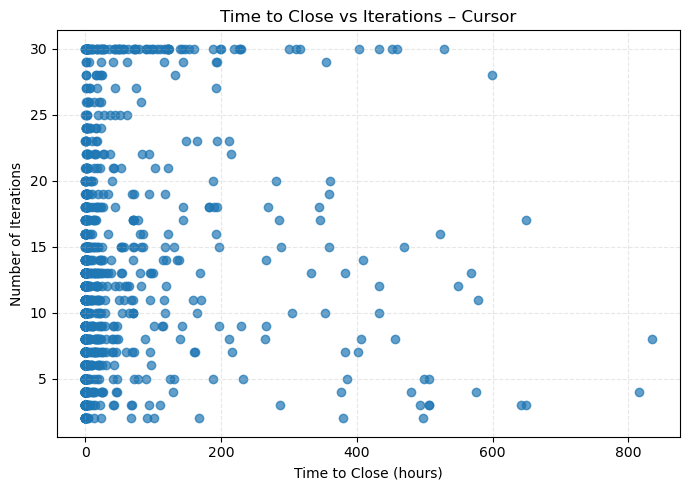

In [10]:
import matplotlib.pyplot as plt

# Drop any rows with missing values in the relevant columns
plot_df = analysis_df.dropna(subset=["hours", "iterations"])

agents = plot_df["agent_x"].unique()

for agent in agents:
    sub = plot_df[plot_df["agent_x"] == agent]

    plt.figure(figsize=(7, 5))
    plt.scatter(sub["hours"], sub["iterations"], alpha=0.7)

    plt.title(f"Time to Close vs Iterations – {agent}")
    plt.xlabel("Time to Close (hours)")
    plt.ylabel("Number of Iterations")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()


### Analysis

Since there is no disitnct pattern this means that these two variables are independant of each other, meaning that the having a low time doesnt tell us much about the iterations.

## adding the user/bot/both to my plot

In [11]:
if pr_df is not None:
    print("Preprocessing PR data...")
    # Filter for closed PRs
    closed_prs = pr_df[pr_df["state"] == "closed"].copy()
    
    # Convert timestamps to datetime
    closed_prs["created_at"] = pd.to_datetime(closed_prs["created_at"])
    closed_prs["closed_at"] = pd.to_datetime(closed_prs["closed_at"])
    
    # Calculate lifecycle in hours
    closed_prs["lifecycle_hours"] = (closed_prs["closed_at"] - closed_prs["created_at"]).dt.total_seconds() / 3600
    
    pr_lifecycle = closed_prs[["id", "state", "lifecycle_hours"]]
    print(pr_lifecycle.head())


if pr_timeline_df is not None:
    print("Calculating iteration cycles...")
    # Group by pr_id and count events
    pr_iterations = (
        pr_timeline_df
        .groupby("pr_id")
        .size()
        .reset_index(name="iteration_cycles")
    )
    print(pr_iterations.head())



if pr_reviews_df is not None:
    print("Categorizing reviewers...")
    # Drop rows with missing user_type
    clean_reviews = pr_reviews_df.dropna(subset=["user_type"]).copy()
    
    # Group by pr_id and get unique user types
    type_map = (
        clean_reviews.groupby("pr_id")["user_type"]
        .apply(lambda x: set(x.unique()))
    )
    
    def label_user_type(types):
        if types == {"User"}:
            return "User"
        elif types == {"Bot"}:
            return "Bot"
        else:
            return "Both"
            
    reviewer_types = type_map.apply(label_user_type).reset_index()
    reviewer_types.columns = ["id", "user_type_final"]
    
    print(reviewer_types.head())


if pr_df is not None and pr_timeline_df is not None and pr_reviews_df is not None:
    print("Merging data...")
    # Merge lifecycle and iterations
    merged_df = pd.merge(
        pr_lifecycle,
        pr_iterations,
        left_on="id",
        right_on="pr_id",
        how="left"
    )
    
    # Merge with reviewer types
    final_df = pd.merge(
        merged_df,
        reviewer_types,
        on="id",
        how="inner" # We only want PRs that have reviewer info
    )
    print(final_df.head())

Preprocessing PR data...
            id   state  lifecycle_hours
0   3264933329  closed        76.038611
1   3265118634  closed        17.258056
2   3265640341  closed         0.100833
3   3265709660  closed         0.635556
16  3234102722  closed        35.815278
Calculating iteration cycles...
        pr_id  iteration_cycles
0  2756921963                30
1  2757103560                22
2  2757124156                 7
3  2757125491                 7
4  2757179026                15
Categorizing reviewers...
           id user_type_final
0  2756921963             Bot
1  2758636941            User
2  2759620798            User
3  2760115428            User
4  2760243902            User
Merging data...
           id   state  lifecycle_hours       pr_id  iteration_cycles  \
0  3265640341  closed         0.100833  3265640341                12   
1  3265709660  closed         0.635556  3265709660                11   
2  3214555104  closed        47.635833  3214555104                30   
3

In [12]:
final_df

,id,state,lifecycle_hours,pr_id,iteration_cycles,user_type_final
0,3265640341,closed,0.100833,3265640341,12,Both
1,3265709660,closed,0.635556,3265709660,11,Bot
2,3214555104,closed,47.635833,3214555104,30,User
3,3214724259,closed,0.004444,3214724259,12,Bot
4,3214782537,closed,203.482500,3214782537,30,Bot
...,...,...,...,...,...,...
7311,3260345989,closed,29.747500,3260345989,17,Bot
7312,3260452571,closed,19.248056,3260452571,7,Both
7313,2857171695,closed,20.076389,2857171695,13,User
7314,2858429985,closed,15.211944,2858429985,18,User


In [13]:
merged = analysis_df.merge(
    final_df[["pr_id", "user_type_final"]],
    on="pr_id",
    how="left"   # or "inner" if you only want matching rows
)

# Drop rows with missing info just in case
plot_df = merged.dropna(subset=["hours", "iterations", "user_type_final"])


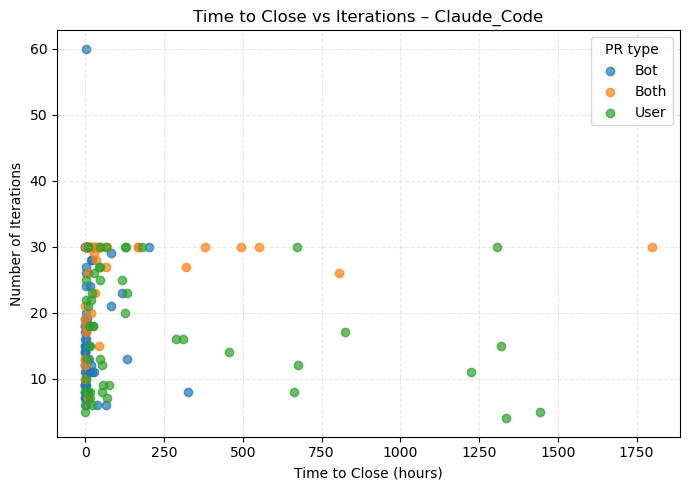

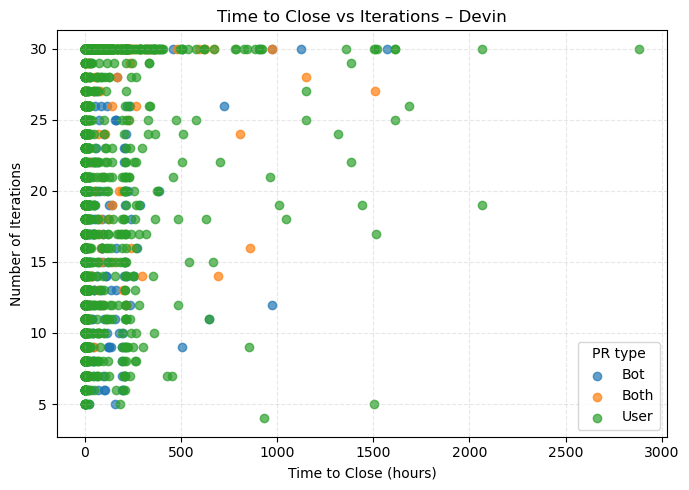

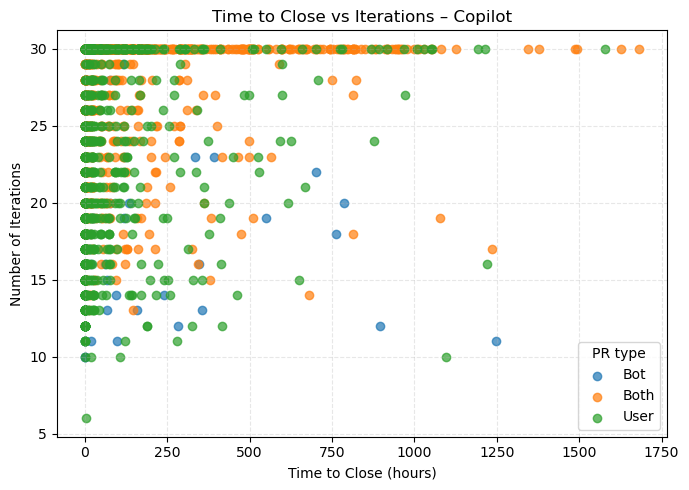

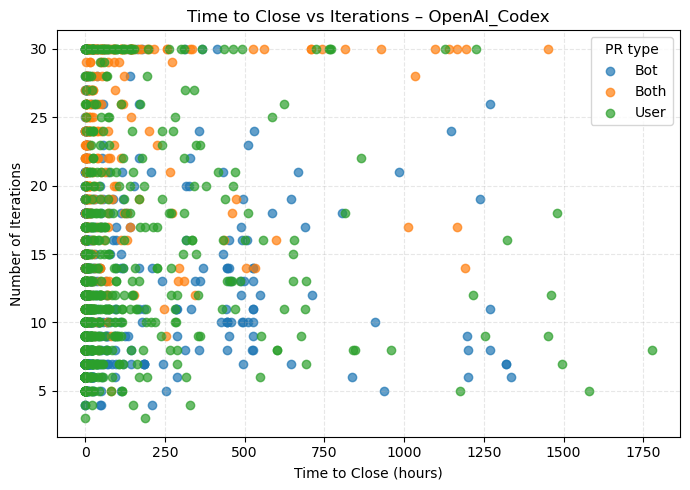

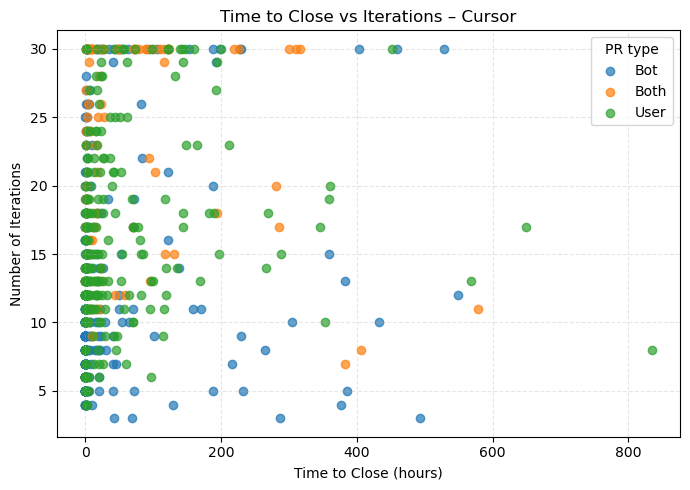

In [14]:
import matplotlib.pyplot as plt

agents = plot_df["agent_x"].unique()

for agent in agents:
    sub = plot_df[plot_df["agent_x"] == agent]

    fig, ax = plt.subplots(figsize=(7, 5))

    # Plot one scatter per user type so the legend is clean
    for user_type, grp in sub.groupby("user_type_final"):
        ax.scatter(
            grp["hours"],
            grp["iterations"],
            alpha=0.7,
            label=user_type
        )

    ax.set_title(f"Time to Close vs Iterations – {agent}")
    ax.set_xlabel("Time to Close (hours)")
    ax.set_ylabel("Number of Iterations")
    ax.grid(True, linestyle="--", alpha=0.3)
    ax.legend(title="PR type")
    fig.tight_layout()
    plt.show()


## Removing ourliers

In [15]:
type_lookup = dict(zip(final_df["pr_id"], final_df["user_type_final"]))
analysis_df["pr_type"] = analysis_df["pr_id"].map(type_lookup)
low = analysis_df["hours"].quantile(0.01)
high = analysis_df["hours"].quantile(0.99)

clean_df = analysis_df[(analysis_df["hours"] >= low) & (analysis_df["hours"] <= high)]


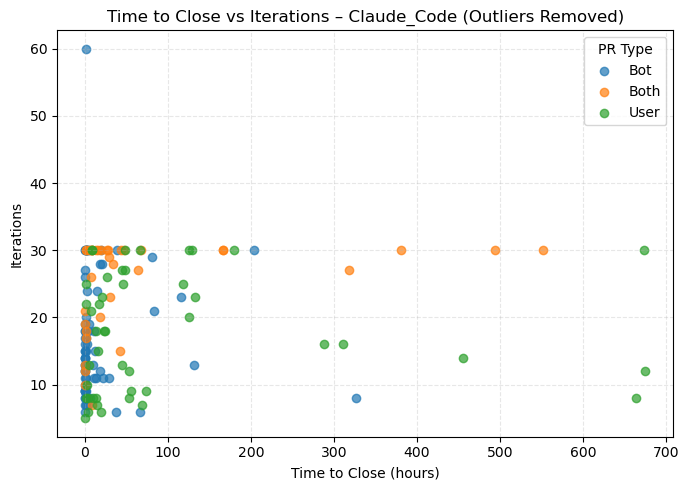

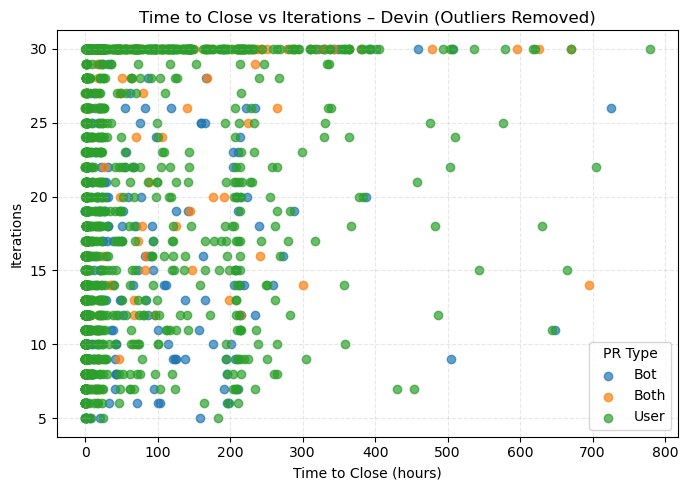

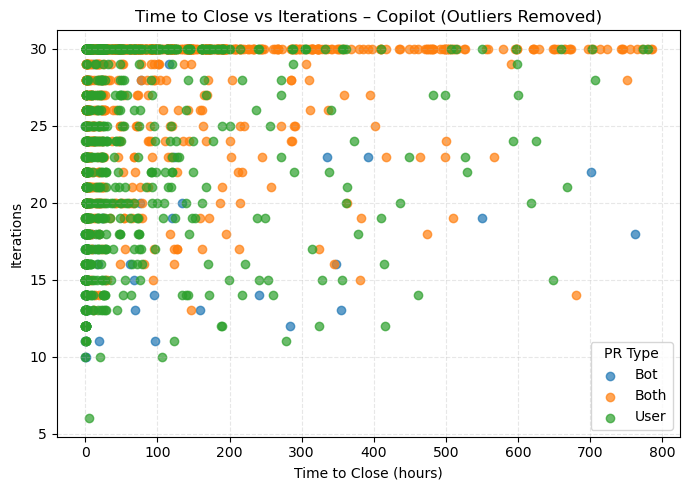

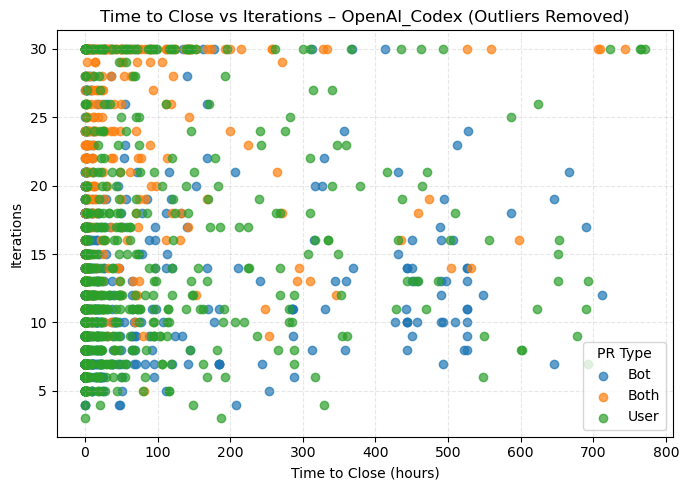

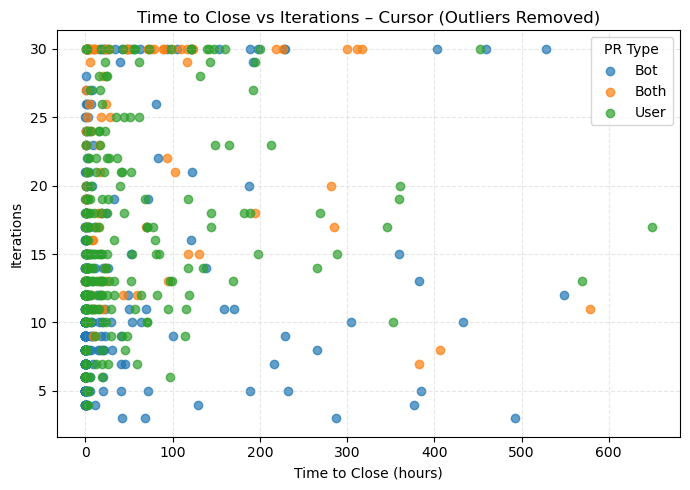

In [16]:
import matplotlib.pyplot as plt

agents = clean_df["agent_x"].unique()

for agent in agents:
    sub = clean_df[clean_df["agent_x"] == agent]

    fig, ax = plt.subplots(figsize=(7, 5))

    # Group by PR type for clean legend
    for pr_type, grp in sub.groupby("pr_type"):
        ax.scatter(
            grp["hours"],
            grp["iterations"],
            alpha=0.7,
            label=pr_type
        )

    ax.set_title(f"Time to Close vs Iterations – {agent} (Outliers Removed)")
    ax.set_xlabel("Time to Close (hours)")
    ax.set_ylabel("Iterations")
    ax.grid(True, linestyle="--", alpha=0.3)
    ax.legend(title="PR Type")
    plt.tight_layout()
    plt.show()


## visualizing the setement analysis

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np

# Set plot style
# sns.set_theme(style="whitegrid")

# Ensure VADER lexicon is downloaded
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    print("Downloading VADER lexicon...")
    nltk.download('vader_lexicon')

if pr_reviews_df is not None:
    print("Analyzing sentiment...")
    # Extract relevant columns and drop missing bodies
    reviews = pr_reviews_df[["pr_id", "body"]].dropna().copy()
    
    sia = SentimentIntensityAnalyzer()
    
    def get_compound_score(text):
        return sia.polarity_scores(text)["compound"]
    
    # Calculate sentiment for each review
    print("Calculating VADER scores (this might take a moment)...")
    reviews["compound_score"] = reviews["body"].apply(get_compound_score)
    
    # Aggregate by PR (Mean score)
    print("Aggregating sentiment per PR...")
    pr_sentiment = reviews.groupby("pr_id")["compound_score"].mean().reset_index()
    
    # Classify sentiment
    def classify_sentiment(score):
        if score > 0.05:
            return "Positive"
        elif score < -0.05:
            return "Negative"
        else:
            return "Neutral"
            
    pr_sentiment["sentiment_category"] = pr_sentiment["compound_score"].apply(classify_sentiment)
    pr_sentiment.columns = ["id", "mean_compound_score", "sentiment_category"]
    
    print(pr_sentiment.head())

Analyzing sentiment...
Calculating VADER scores (this might take a moment)...
Aggregating sentiment per PR...
           id  mean_compound_score sentiment_category
0  2760115428               0.0000            Neutral
1  2766353261              -0.1779           Negative
2  2768057346               0.4926           Positive
3  2768057378               0.4199           Positive
4  2768132850              -0.5267           Negative


In [24]:
if pr_df is not None and pr_timeline_df is not None and pr_reviews_df is not None:
    print("Merging data...")
    merged_df = pd.merge(
        pr_lifecycle,
        pr_iterations,
        left_on="id",
        right_on="pr_id",
        how="left"
    )
    
    final_df_1 = pd.merge(
        merged_df,
        pr_sentiment,
        on="id",
        how="inner" # Only PRs with reviews/sentiment
    )
    print(final_df_1.head())

Merging data...
           id   state  lifecycle_hours       pr_id  iteration_cycles  \
0  3265709660  closed         0.635556  3265709660                11   
1  3214555104  closed        47.635833  3214555104                30   
2  3214724259  closed         0.004444  3214724259                12   
3  3214876564  closed         0.938333  3214876564                30   
4  3215868710  closed        13.475000  3215868710                30   

   mean_compound_score sentiment_category  
0             0.790600           Positive  
1             0.332200           Positive  
2             0.653100           Positive  
3             0.499460           Positive  
4             0.398367           Positive  


In [25]:
sent_lookup = dict(zip(final_df_1["pr_id"], final_df_1["sentiment_category"]))
analysis_df["sentiment_category"] = analysis_df["pr_id"].map(sent_lookup)
plot_df = analysis_df.dropna(subset=["hours", "iterations", "sentiment_category"])


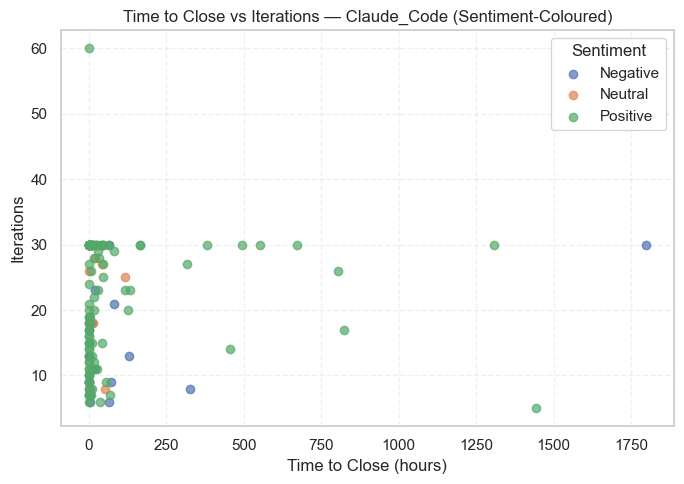

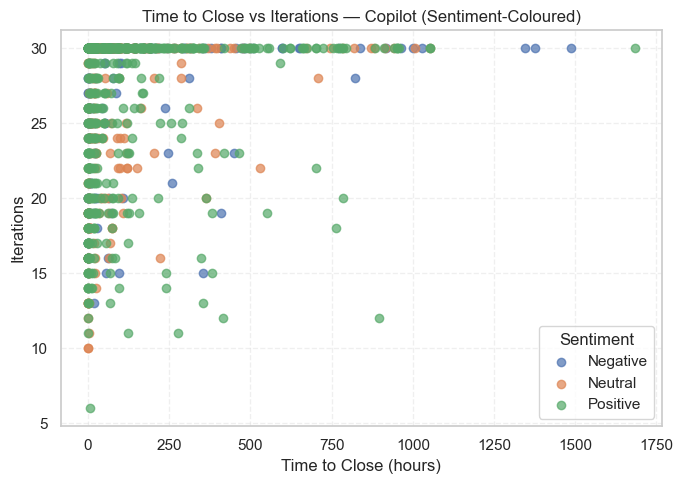

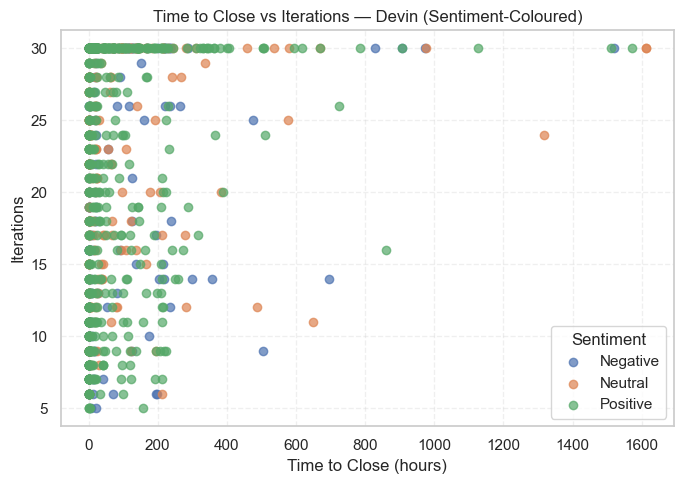

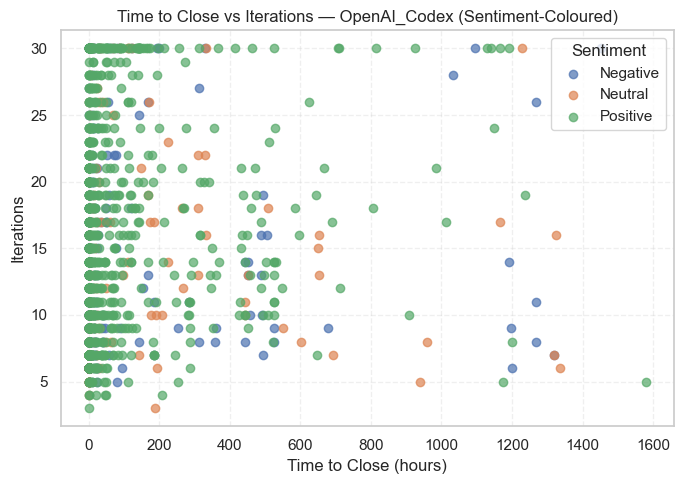

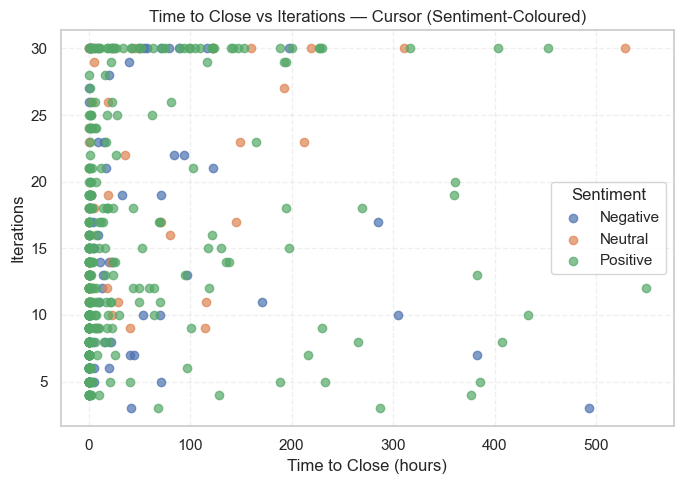

In [26]:
import matplotlib.pyplot as plt

agents = plot_df["agent_x"].unique()

for agent in agents:
    sub = plot_df[plot_df["agent_x"] == agent]

    fig, ax = plt.subplots(figsize=(7, 5))

    # one scatter per sentiment group to make legend nice
    for sent, grp in sub.groupby("sentiment_category"):
        ax.scatter(
            grp["hours"],
            grp["iterations"],
            alpha=0.7,
            label=sent
        )

    ax.set_title(f"Time to Close vs Iterations — {agent} (Sentiment-Coloured)")
    ax.set_xlabel("Time to Close (hours)")
    ax.set_ylabel("Iterations")
    ax.grid(True, linestyle="--", alpha=0.3)
    ax.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()


In [29]:
low = plot_df["hours"].quantile(0.05)
high = plot_df["hours"].quantile(0.95)

clean_df = plot_df[(plot_df["hours"] >= low) & (plot_df["hours"] <= high)]


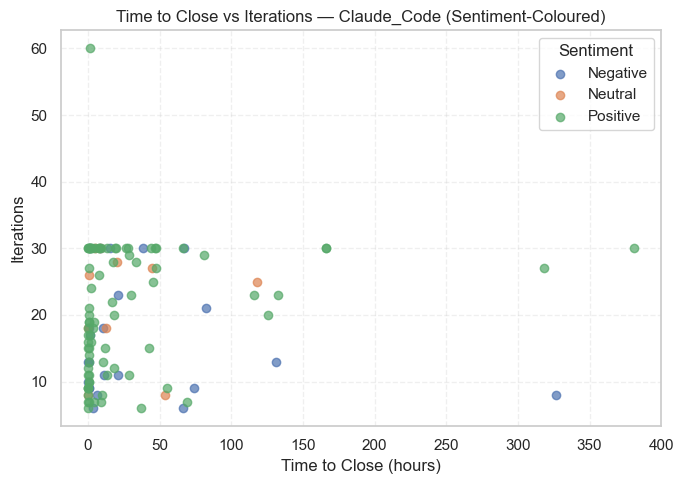

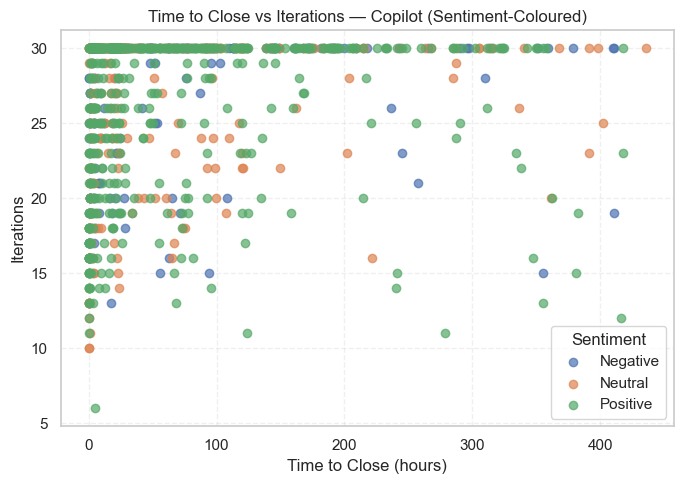

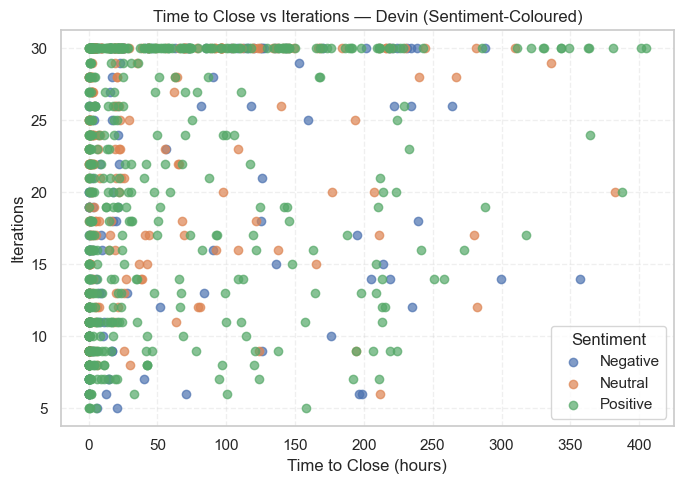

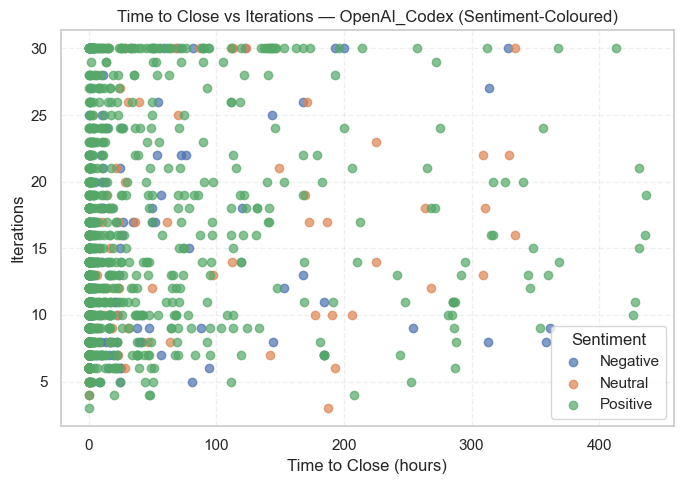

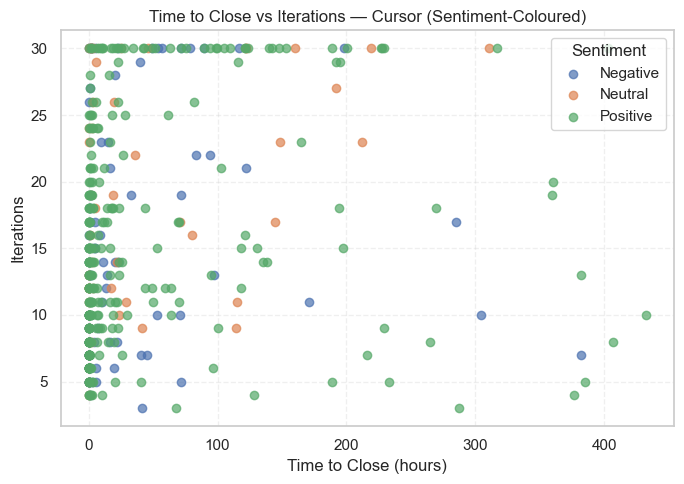

In [30]:
import matplotlib.pyplot as plt

agents = clean_df["agent_x"].unique()

for agent in agents:
    sub = clean_df[clean_df["agent_x"] == agent]

    fig, ax = plt.subplots(figsize=(7, 5))

    # one scatter per sentiment group to make legend nice
    for sent, grp in sub.groupby("sentiment_category"):
        ax.scatter(
            grp["hours"],
            grp["iterations"],
            alpha=0.7,
            label=sent
        )

    ax.set_title(f"Time to Close vs Iterations — {agent} (Sentiment-Coloured)")
    ax.set_xlabel("Time to Close (hours)")
    ax.set_ylabel("Iterations")
    ax.grid(True, linestyle="--", alpha=0.3)
    ax.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()


<Axes: xlabel='sentiment_category', ylabel='hours'>

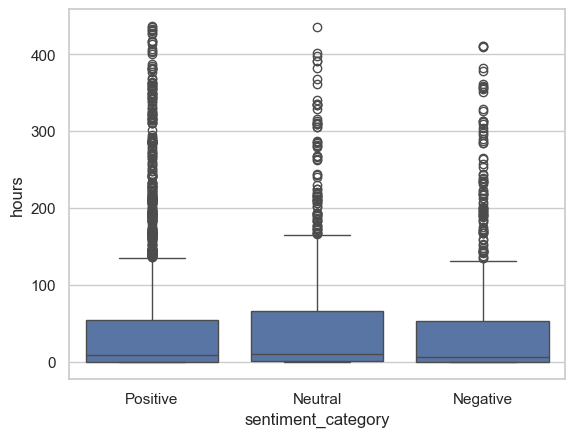

In [31]:
sns.boxplot(data=clean_df, x="sentiment_category", y="hours")


In [32]:
clean_df.groupby(["agent_x", "sentiment_category"])["hours"].median()


agent_x       sentiment_category
Claude_Code   Negative              10.371111
              Neutral               10.566806
              Positive               6.321250
Copilot       Negative              23.051667
              Neutral               19.895833
              Positive              22.895417
Cursor        Negative               5.071528
              Neutral                3.605556
              Positive               2.997500
Devin         Negative              15.630139
              Neutral                8.612500
              Positive              17.639444
OpenAI_Codex  Negative               1.444722
              Neutral                0.568056
              Positive               2.864583
Name: hours, dtype: float64

In [33]:
clean_df["iter_bin"] = pd.cut(clean_df["iterations"], bins=[0,5,10,20,30])
clean_df.groupby("iter_bin")["sentiment_category"].value_counts(normalize=True)


C:\Users\preet\AppData\Local\Temp\ipykernel_30572\815110863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["iter_bin"] = pd.cut(clean_df["iterations"], bins=[0,5,10,20,30])


iter_bin  sentiment_category
(0, 5]    Positive              0.657143
          Negative              0.228571
          Neutral               0.114286
(5, 10]   Positive              0.621858
          Negative              0.224044
          Neutral               0.154098
(10, 20]  Positive              0.668706
          Neutral               0.167832
          Negative              0.163462
(20, 30]  Positive              0.586339
          Neutral               0.251913
          Negative              0.161749
Name: sentiment_category, dtype: float64

In [34]:
from sklearn.linear_model import LogisticRegression

df_model = clean_df.dropna(subset=["iterations", "hours", "sentiment_category"])
df_model["sent_binary"] = (df_model["sentiment_category"]=="Positive").astype(int)

X = df_model[["hours", "iterations"]]
y = df_model["sent_binary"]

model = LogisticRegression().fit(X, y)
model.coef_, model.intercept_


(array([[ 0.00029403, -0.013079  ]]), array([0.72772711]))

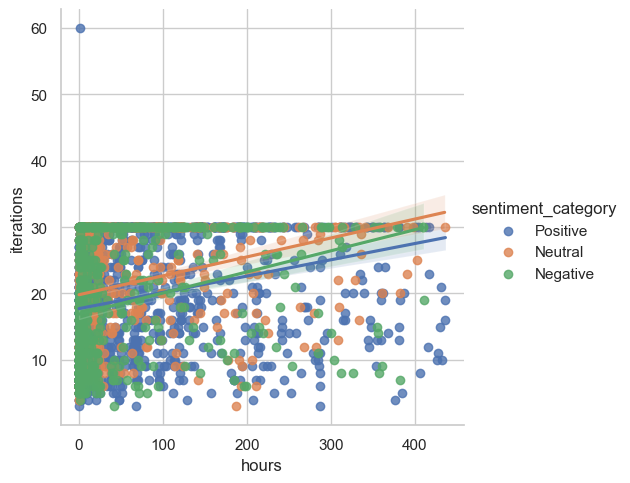

In [35]:
sns.lmplot(
    data=clean_df,
    x="hours", y="iterations",
    hue="sentiment_category",
    fit_reg=True
)


In [38]:
clean_df


,pr_id,agent_x,iterations,id,created_at,closed_at,agent_y,time_to_close,hours,pr_type,sentiment_category,iter_bin,cluster
0,3225725945,Claude_Code,60,3225725945,2025-07-12 20:01:16+00:00,2025-07-12 21:13:35+00:00,Claude_Code,0 days 01:12:19,1.205278,Bot,Positive,NaN,0
2,3226175596,Copilot,30,3226175596,2025-07-13 06:11:58+00:00,2025-07-14 02:51:28+00:00,Copilot,0 days 20:39:30,20.658333,Both,Positive,"(20.0, 30.0]",0
6,3023723466,Devin,30,3023723466,2025-04-28 05:12:26+00:00,2025-04-28 06:25:39+00:00,Devin,0 days 01:13:13,1.220278,User,Neutral,"(20.0, 30.0]",0
8,3025434270,Devin,30,3025434270,2025-04-28 16:01:18+00:00,2025-05-03 20:36:08+00:00,Devin,5 days 04:34:50,124.580556,User,Neutral,"(20.0, 30.0]",2
10,3226265972,Copilot,30,3226265972,2025-07-13 08:36:39+00:00,2025-07-17 06:54:28+00:00,Copilot,3 days 22:17:49,94.296944,Both,Neutral,"(20.0, 30.0]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30194,3224590973,Cursor,3,3224590973,2025-07-12 00:57:59+00:00,2025-07-14 21:04:55+00:00,Cursor,2 days 20:06:56,68.115556,Bot,Positive,"(0.0, 5.0]",2
30656,3245776477,Cursor,3,3245776477,2025-07-19 23:56:59+00:00,2025-07-21 17:43:39+00:00,Cursor,1 days 17:46:40,41.777778,Bot,Negative,"(0.0, 5.0]",0
30913,3133981875,OpenAI_Codex,3,3133981875,2025-06-10 15:11:09+00:00,2025-06-18 10:35:22+00:00,OpenAI_Codex,7 days 19:24:13,187.403611,User,Neutral,"(0.0, 5.0]",2
31036,3215375260,Cursor,3,3215375260,2025-07-09 10:15:40+00:00,2025-07-21 09:25:27+00:00,Cursor,11 days 23:09:47,287.163056,Bot,Positive,"(0.0, 5.0]",1
